# 5.1 - Fully non-linear problems: Random nested search #

*Written by Andrew Valentine and Malcolm Sambridge*

<!--<badge>--><a href="https://colab.research.google.com/github/msambridge/InversionPracticals/blob/main/Solutions/S5.1 - Fully nonlinear search Rosenbrock-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

The first examination of a fully nonlinear search problem is to a relatively smooth analytical function known as the Rosenbriock function. This practial explores how to find its minimum with a nested grid algorithm. We will assume that our inverse problems as resulted in a misfit function that is equiavlent to the Rosenbrock function. Note that the Rosenbrock function can easily be generalized to higher dimensions and a challenge task for the student is to generalize the nested grid algorithm produced here to higher dimensions and see how well it performs.


Suppose we have two unknowns, $(x_1, x_2)$. We measure $x_1$ directly
and obtain a value of $1\pm\sigma$ (where the measurement error is
$\sigma=10$). Suppose also that we know the following property should
hold, $x^2_1 = x_2$. We wish to find the best compromise values of
$(x_1, x_2)$ which both fit the data and the extra constraint. We could
solve this problem by finding $(x_1, x_2)$ which minimizes the least
squares misfit function

$$f(x_1, x_2) = \frac{(1-x_1)^2}{100} + (x_2-x_1^2)^2.$$

This is hardly necessary because the solution is fairly obvious, i.e.
$x_1 = x_2 = 1$, and indeed this solution corresponds to a global
minimum in the misfit function $f(1,1) = 0$. The misfit surface is
plotted below and is known as the Rosenbrock function.
Although its global minimum is known it can be quite difficult to locate
with an optimization algorithm (because it lies at the end of a long
valley).


 <img src="../Figures/rosenbrock.png" alt="Bootstrap figure" width="400"/>
The Rosenbrock minimization function for a two parameter problem.

Lets load some libraries.

In [1]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !git clone https://github.com/msambridge/InversionPracticals
# %cd InversionPracticals/Solutions

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Here is a simple function that evaluates the Rosenbrock function in 2D, together with a contour plot.

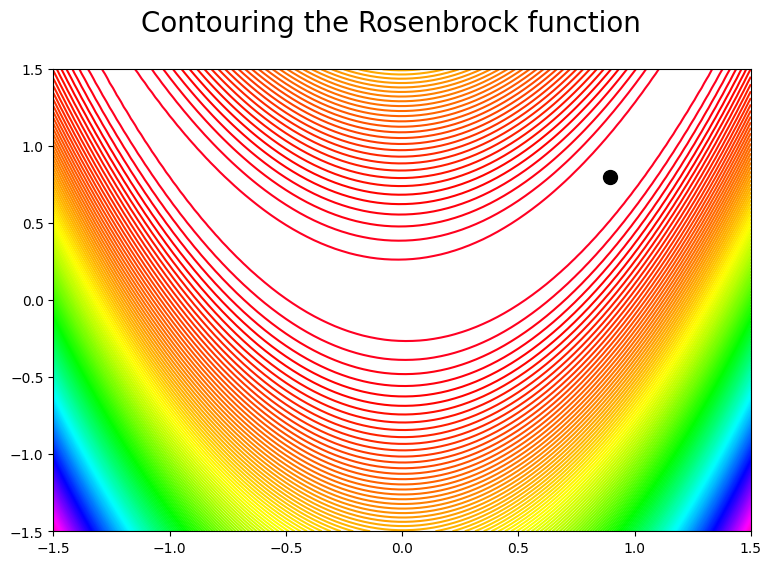

In [3]:
def rosenbrock2D(x): return 0.01*(1.0-x[0])**2 + (x[1]-x[0]**2)**2

contour = 1 # add a contour map to help visualize
if(contour==1): # contour the function instead  
    x0,x1 = np.array([-1.5,-1.5]),np.array([1.5,1.5])
    fig = plt.figure(figsize=(9,6))
    fig.suptitle("Contouring the Rosenbrock function", fontsize=20)
    nc = 100 # discretization level
    xc = np.linspace(x0[0],x1[0],nc)
    yc = np.linspace(x0[1],x1[1],nc)
    fc = np.zeros((nc,nc))
    xv, yv = np.meshgrid(xc,yc)
    for i in range(nc):
        for j in range(nc):
            fc[i,j] = rosenbrock2D([xv[i,j],yv[i,j]])
    iy,ix = np.unravel_index(fc.argmin(), fc.shape)
    plt.plot(xc[ix],yc[iy],'ok',markersize=10)
    cs  = plt.contour(xv,yv,fc,180,cmap=cm.gist_rainbow)            
    plt.show()

**Task 1** Find the global minimum of this function using simple uniform Monte
    Carlo random search. <span>**Write a python script**</span> to
    generate random points in a plane in the ranges
    $-1.5 \le x_1 \le 1.5$, and $-1.5 \le x_2 \le 1.5$. Calculate
    $f(x_1, x_2)$ for each of your points and plot the minimum as a
    function of the number of points tested. How many do you need to
    generate to get a good solution? It can be instructive to plot the
    minimum in $f(x_1, x_2)$ as a function of the number of points that you
    generate.

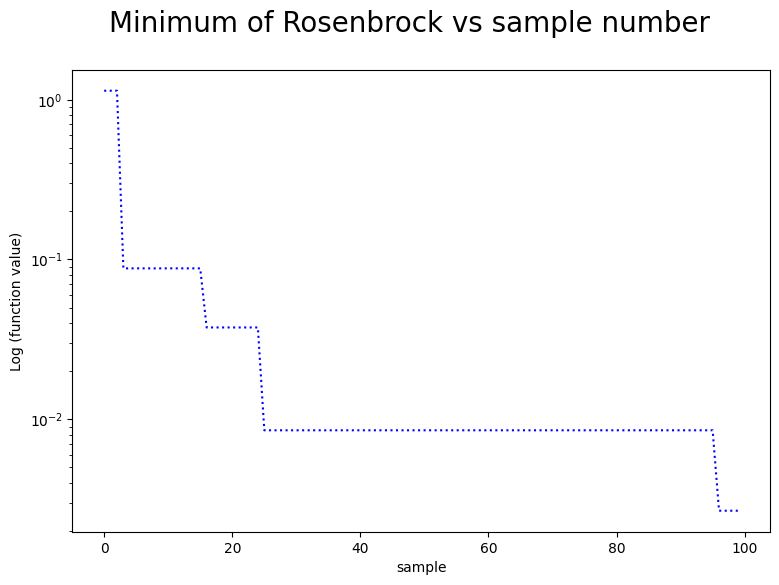

 Lowest point found after 100  samples is at [0.69376384 0.5230287 ]  with value 0.002678399987437174


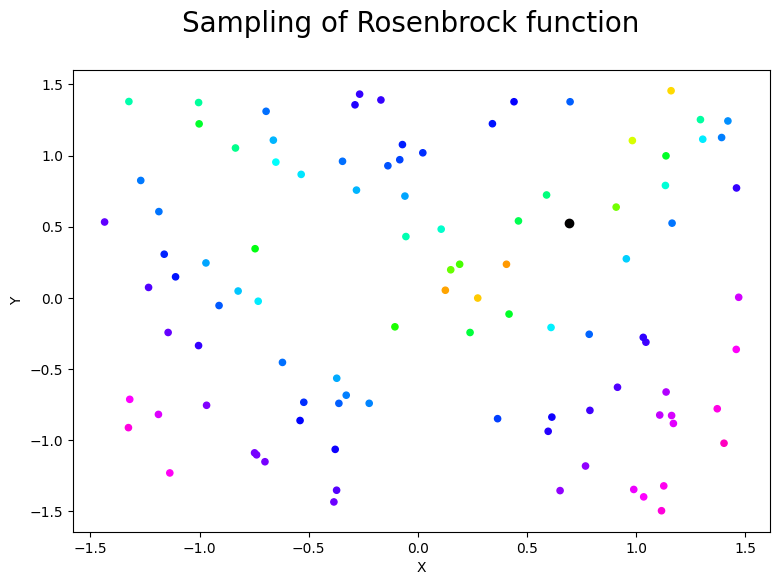

In [4]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

n = 100 # Number of random points
x0,x1 = np.array([-1.5,-1.5]),np.array([1.5,1.5])
x,f = np.zeros((n,2)),np.zeros(n)
for i in range(n):
    x[i] = x0 + (x1-x0)*np.random.random_sample(2)
    f[i] = rosenbrock2D(x[i])
    
    # plot minimum as a function of number of samples
fig = plt.figure(figsize=(9,6))
fig.suptitle("Minimum of Rosenbrock vs sample number", fontsize=20)
ym=np.zeros(n)
for i in range(n): ym[i] = np.min(f[:i+1])
plt.semilogy(ym,'b:')
plt.xlabel('sample')
plt.ylabel('Log (function value)')
plt.show()
print(' Lowest point found after',n,' samples is at', x[np.argmin(f)],' with value',np.min(f))

# plot samples
fig = plt.figure(figsize=(9,6))
fig.suptitle("Sampling of Rosenbrock function", fontsize=20)
plt.scatter(x.T[0], x.T[1],c=np.log(f), s=20,cmap=cm.gist_rainbow)
plt.plot(x.T[0][np.argmin(f)],x.T[1][np.argmin(f)],'ok')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


**Task 2:** Now build a nested Monte Carlo search by repeating the exercise but stop the process after a fixed number of
    samples, say $N_s$ (you choose $N_s$). Then centre a new smaller box
    with side length $L$ (you choose $L$, e.g. 1/2 or 3/4 of the length
    of the original) at your current best solution and repeat the
    process. You have built a <span>**nested grid parameter search
    scheme**</span>. Repeat this several times and see if the solution
    is more accurate and the convergence any quicker than with the
    single stage approach.

 Lowest point found after :

1000  samples is at [np.float64(1.083476344418595), np.float64(1.191419017269828)]  with value 0.00037586399709241334  boxsize 3.0
2000  samples is at [np.float64(1.0486206214855531), np.float64(1.0998487163828732)]  with value 2.369894476403495e-05  boxsize 1.6079
3000  samples is at [np.float64(0.9739222943332371), np.float64(0.9516656120017492)]  with value 1.6666201345453066e-05  boxsize 0.8552
4000  samples is at [np.float64(1.0137192660122625), np.float64(1.0256294609171916)]  with value 5.871347415676651e-06  boxsize 0.4053
5000  samples is at [np.float64(0.9936455481062231), np.float64(0.9883982448240614)]  with value 1.5417878673667474e-06  boxsize 0.2146


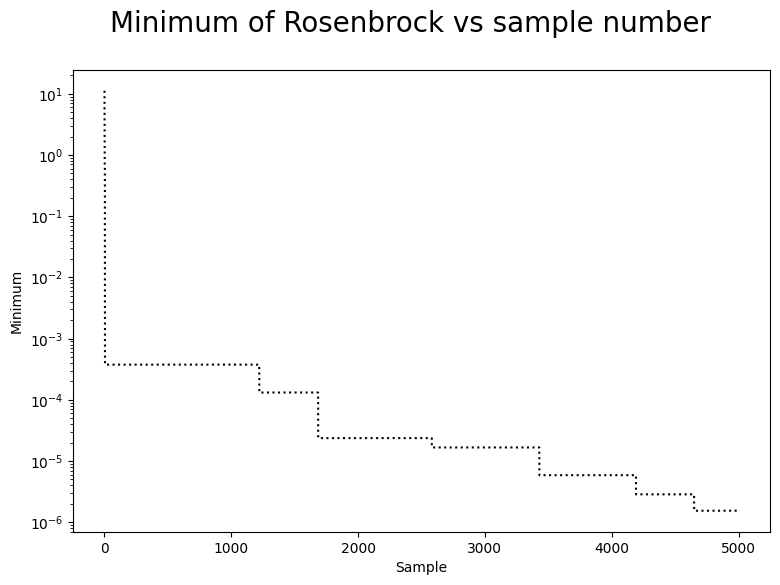

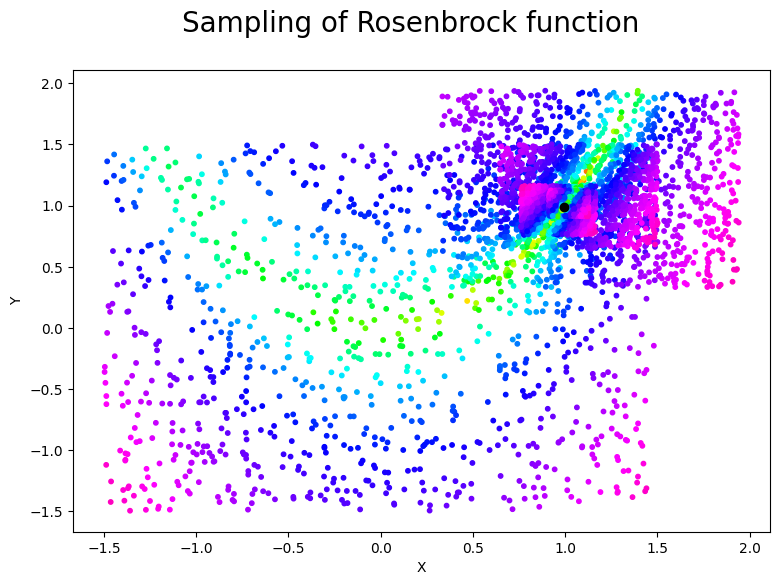

In [5]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

nsamples,niterations,factor = 1000,3,0.75 # number of samples per iteration, number of iterations,box shrink factor
nsamples,niterations,factor = 1000,5,0.5 # number of samples per iteration, number of iterations,box shrink factor
x0,x1 = np.array([-1.5,-1.5]),np.array([1.5,1.5]) # starting box size
boxsize = x1-x0
x,f = np.zeros((niterations,nsamples,2)),np.ones((niterations,nsamples))
print(' Lowest point found after :\n')
for j in range(niterations): # loop over iterations
    for i in range(nsamples):       # loop over samples
        x[j,i] = x0 + (x1-x0)*np.random.random_sample(2)
        f[j,i] = rosenbrock2D(x[j,i])
    xm = [x[:,:,0].flatten()[np.argmin(f)],x[:,:,1].flatten()[np.argmin(f)]]
    print(nsamples*(j+1),' samples is at', xm,' with value',np.min(f),' boxsize',np.round(boxsize[0],4))
    x0,x1 = xm[0]-factor*boxsize*0.5,xm[1]+factor*boxsize*0.5 # update box size
    boxsize = x1-x0
fig = plt.figure(figsize=(9,6))
fig.suptitle("Minimum of Rosenbrock vs sample number", fontsize=20)
ym=np.zeros(niterations*nsamples)
for i in range(nsamples*niterations): ym[i] = np.min(f.flatten()[:i+1])
plt.semilogy(np.linspace(1,nsamples*niterations,nsamples*niterations),ym,'k:')
plt.xlabel('Sample')
plt.ylabel('Minimum')
plt.show()

# plot samples
fig = plt.figure(figsize=(9,6))
fig.suptitle("Sampling of Rosenbrock function", fontsize=20)
for j in range(niterations): #
    plt.scatter(x[j,:,0], x[j,:,1],c=np.log(f[j]), s=10,cmap=cm.gist_rainbow)
plt.plot(x[:,:,0].flatten()[np.argmin(f)],x[:,:,1].flatten()[np.argmin(f)],'ok')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


**Task 3:** If you want a challenge then repeat the problem with multiple
    unknowns and data. The $N$ variable Rosenbrock function is

$$f(x_1, x_2,\dots,x_N) = \sum_{i=1}^{N-1}(1-x_i)^2 + 100(x_{i+1}-x^2_i)^2.$$

But beware this function has local minima as well as a global
    minimum.


In [6]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



----